Load Data:


We will use torchvision and torch.utils.data packages for loading the data.

The problem we're going to solve today is to train a model to classify cat and dog.

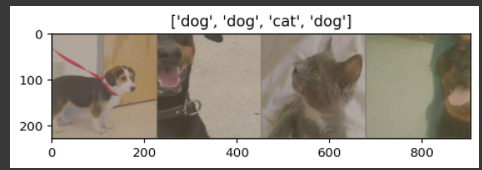

In [12]:
# Imports here
import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import optim, nn
from torchvision import datasets, transforms, models
from collections import OrderedDict
import torchvision
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from PIL import Image
import numpy as np

data_dir = 'drive/MyDrive/big_data/Cat_Dog_data'
train_dir = data_dir + '/train'
test_dir = data_dir + '/test'
class_names = ["cat", "dog"]

# Define your transforms for the training, validation, and testing sets

train_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

test_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

# Load the datasets with ImageFolder

train_data = torchvision.datasets.ImageFolder(train_dir , transform=train_transform)
test_data = torchvision.datasets.ImageFolder(test_dir, transform=test_transform)

# Using the image datasets and the trainforms, define the dataloaders

trainloader = torch.utils.data.DataLoader(train_data, batch_size = 4, shuffle = True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle = False)

# Load a pre-trained network and reset final fully connected layer
model = models.vgg16(pretrained=True)

# Freeze parameters so we don't backprop through them.
for param in model.parameters():
    param.requires_grad = False

# Use GPU if it's available.   
device= torch.device("cuda" if torch.cuda.is_available() else 'cpu')

model.to(device)
class Classifier(nn.Module):
    # Define a new, untrained feed-forward network as a classifier, using ReLU activations and dropout

    def __init__(self, input_size, output_size, hidden_layers): # (25088, 102, [1012, 512, 128])
      super().__init__()
      self.input = nn.Linear(input_size, hidden_layers[0])
      self.h2 = nn.Linear(hidden_layers[0], hidden_layers[1])
      self.h3 = nn.Linear(hidden_layers[1], hidden_layers[2])
      self.output = nn.Linear(hidden_layers[-1], output_size)
        # Dropout=20%
      self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):    
      x = x.view(x.shape[0], -1)
      x = self.dropout(F.relu(self.input(x)))
      x = self.dropout(F.relu(self.h2(x)))
      x = self.dropout(F.relu(self.h3(x)))
      x = F.log_softmax(self.output(x),dim=1)

      return x


